<a href="https://colab.research.google.com/github/mrzack18/Sistem-Pakar-Certainty-Factor-Fuzzy-Logic-/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Liblary**

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


# **Kode Awal**

Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 90.28%


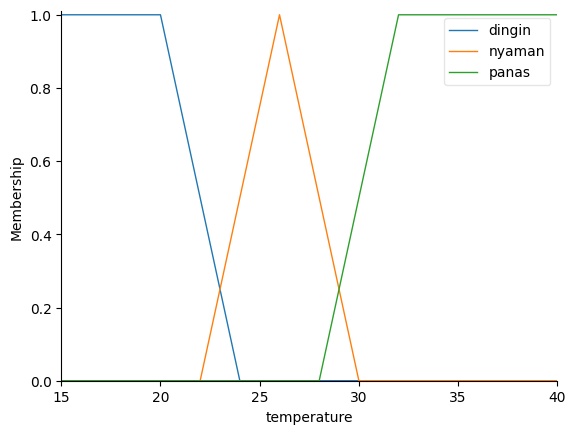

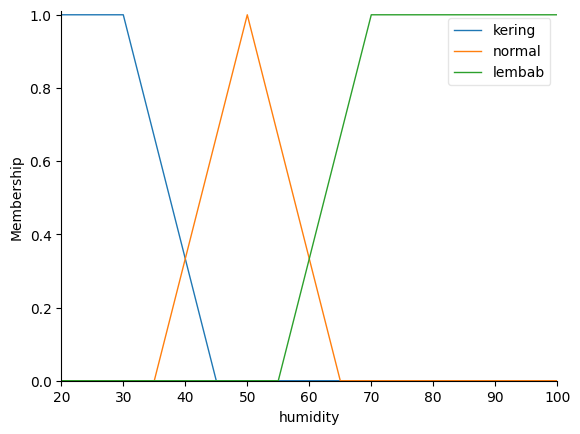

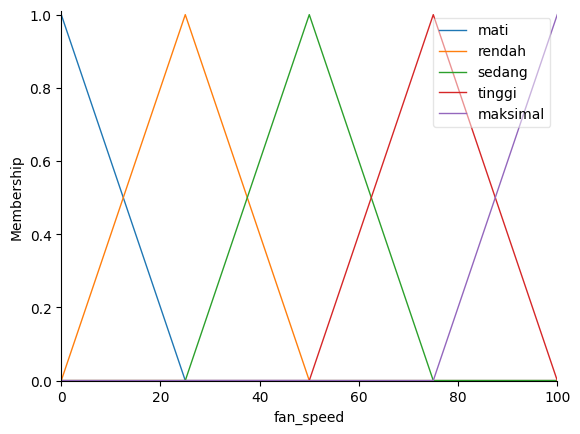

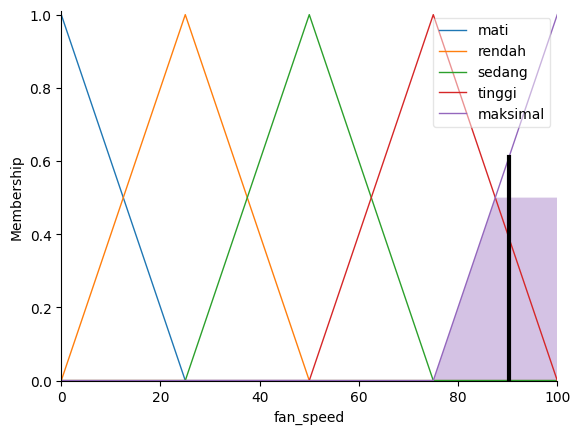

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl. Antecedent (np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent (np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent (np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature ['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature ['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature ['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature ['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule (temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature ['panas'] & humidity['lembab'], fan_speed['maksimal'])

#Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule9])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

#Input values
ac.input['temperature'] = 30
ac.input['humidity'] = 75

#Compute result
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

#Visualize result
fan_speed.view(sim=ac)
plt.show()

# **1. Ubah input_suhu jadi 22°C. Apa yang terjadi?**

Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


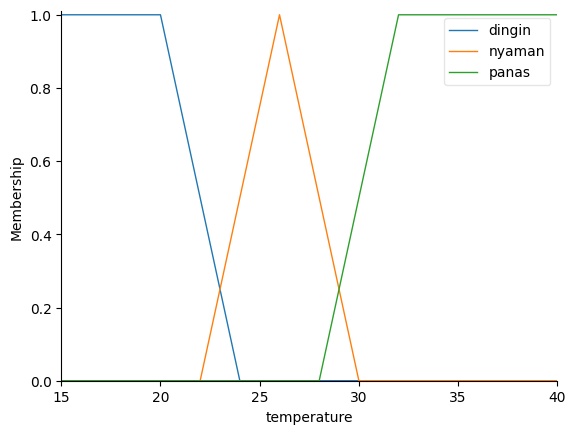

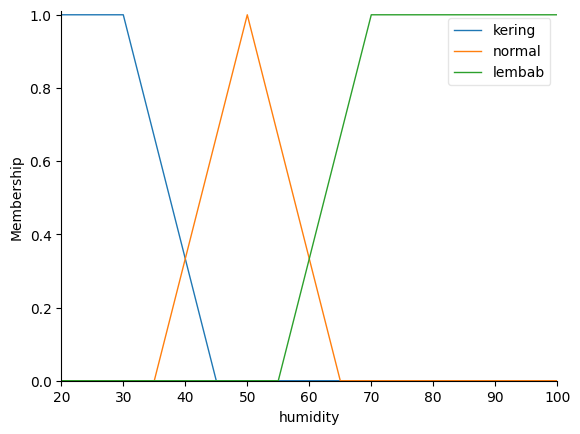

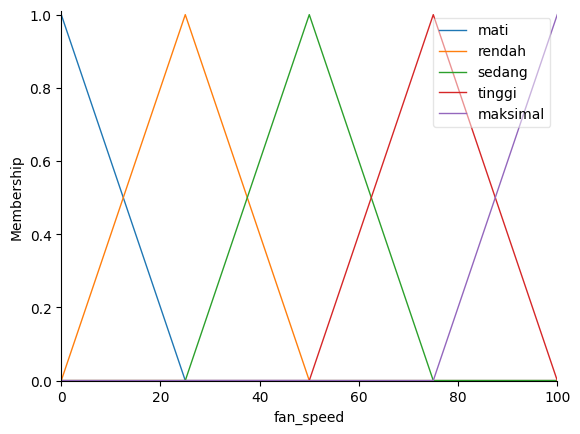

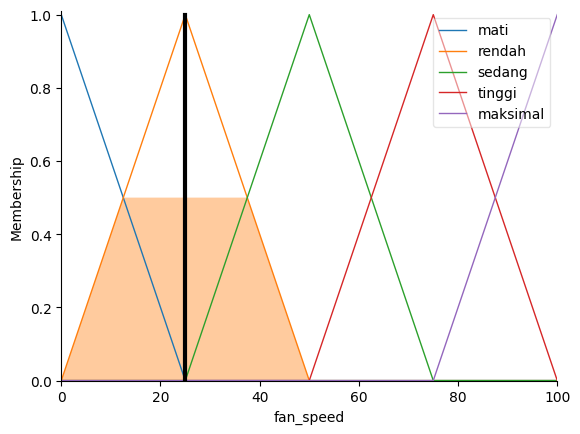

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl. Antecedent (np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent (np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent (np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature ['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature ['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature ['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature ['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule (temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature ['panas'] & humidity['lembab'], fan_speed['maksimal'])

#Create control system
ac_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

#Input values
ac.input['temperature'] = 22
ac.input['humidity'] = 75

#Compute result
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

#Visualize result
fan_speed.view(sim=ac)
plt.show()

# **2. Tambahkan variabel kelembaban dan buat aturan baru (contoh: jika panas DAN lembab, kipas cepat) -> contoh ini tidak boleh digunakan**

Untuk suhu 22°C, kelembaban 75% dan cahaya 76%, kecepatan kipas AC: 22.02%


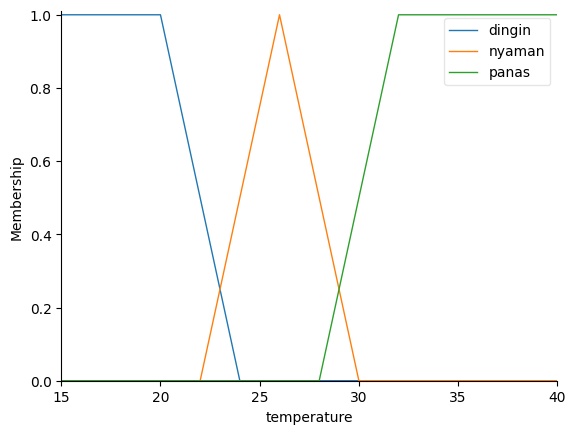

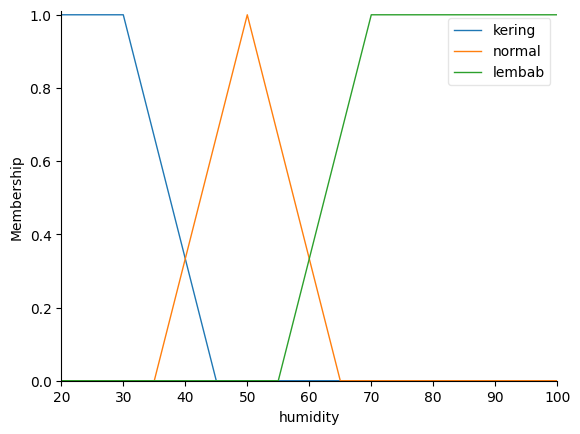

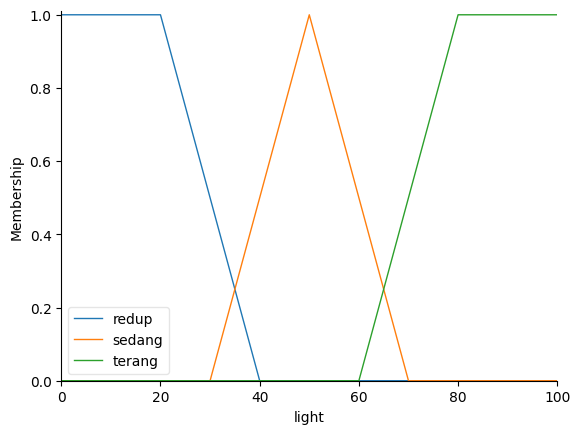

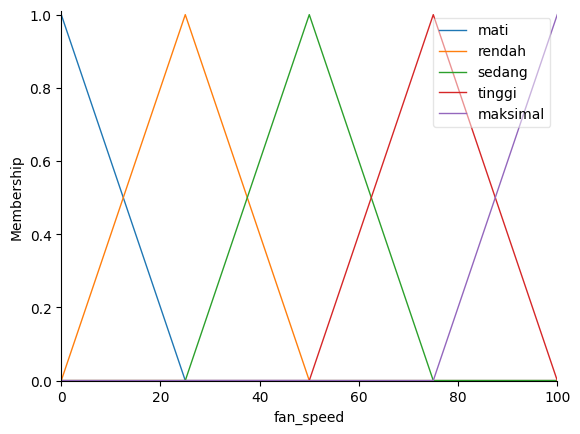

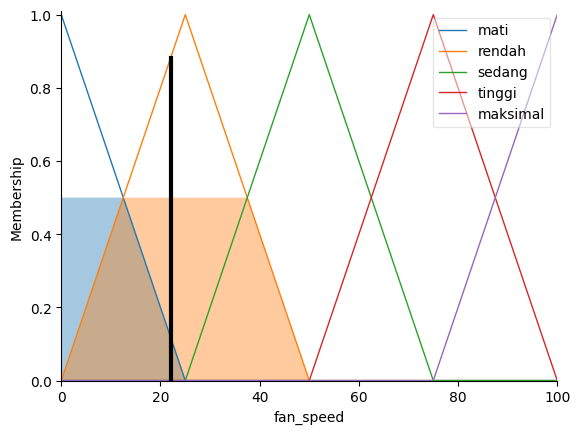

In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl. Antecedent (np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent (np.arange(20, 101, 1), 'humidity')
light = ctrl.Antecedent(np.arange(0, 101, 1), 'light')

# Output variable
fan_speed = ctrl.Consequent (np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions untuk light
light['redup'] = fuzz.trapmf(light.universe, [0, 0, 20, 40])
light['sedang'] = fuzz.trimf(light.universe, [30, 50, 70])
light['terang'] = fuzz.trapmf(light.universe, [60, 80, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
light.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature ['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature ['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature ['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule (temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature ['panas'] & humidity['lembab'], fan_speed['maksimal'])
rule10 = ctrl.Rule(temperature['panas'] & humidity['lembab'] & light['terang'], fan_speed['maksimal'])
rule11 = ctrl.Rule(temperature['nyaman'] & humidity['normal'] & light['sedang'], fan_speed['sedang'])
rule12 = ctrl.Rule(temperature['dingin'] & light['redup'], fan_speed['mati'])

#Create control system
ac_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12
])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

#Input values
ac.input['temperature'] = 22
ac.input['humidity'] = 75
ac.input['light'] = 20

#Compute result
ac.compute()
print(f"Untuk suhu 22°C, kelembaban 75% dan cahaya 20%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

#Visualize result
fan_speed.view(sim=ac)
plt.show()

# **3. Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?**
## Definisi Fungsi Keanggotaan Suhu
```python
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])
```

### Ketika Suhu = 28°C:

#### Pada “nyaman”:
- 28 masih berada dalam rentang 26–30 → bagian menurun dari segitiga  
- Maka, derajat keanggotaan (μ) < 1, misalnya sekitar 0.5

#### Pada “panas”:
- 28 berada di awal trapesium → bagian naik dari 28–32  
- Maka juga punya nilai keanggotaan, misalnya sekitar 0.25–0.5

---

## Inti dari Logika Fuzzy

Tidak seperti logika biner (ya/tidak), logika fuzzy mengakomodasi ketidakpastian.

- Nilai bisa masuk lebih dari satu kategori sekaligus  
- Keputusan diambil berdasarkan kombinasi nilai keanggotaan dari semua aturan


# **4. Jelaskan bagaimana hasil perubahannya dalam bentuk komentar atau teks cell**

### 1. Kecepatan Kipas Berdasarkan Suhu dan Kelembaban

Sistem fuzzy ini menghitung kecepatan kipas AC berdasarkan dua variabel utama, yaitu suhu dan kelembaban. Untuk suhu 22°C dan kelembaban 75%, hasil perhitungan menunjukkan bahwa kecepatan kipas sekitar 43%, yang berarti kipas berputar pada kecepatan menengah.

### 2. Penambahan Variabel Cahaya

Dengan menambahkan variabel cahaya (light), kecepatan kipas AC kini dipengaruhi oleh tiga faktor: suhu, kelembaban, dan intensitas cahaya. Sebagai contoh, pada input suhu 22°C, kelembaban 75%, dan cahaya 20%, sistem mengaktifkan aturan yang menyatakan bahwa dengan cahaya rendah, kecepatan kipas akan rendah. Meskipun demikian, hasil perhitungan menunjukkan kecepatan kipas sekitar 43%. Ini menunjukkan bahwa meskipun cahaya redup, aturan tersebut lebih condong ke kecepatan menengah.

Hasil perhitungan ini kemudian divisualisasikan dalam sebuah grafik yang menunjukkan hubungan antara variabel-variabel tersebut dan kecepatan kipas.

### 3. Keanggotaan Suhu dalam Kategori "Nyaman" dan "Panas"

Pada suhu 28°C, nilai keanggotaan berada di dua kategori, yaitu "Nyaman" dan "Panas". Hal ini disebabkan oleh suhu 28°C yang berada di perbatasan antara kedua kategori tersebut. Fungsi keanggotaan untuk "Nyaman" mencakup suhu sekitar 28°C, sementara "Panas" dimulai dari suhu 28°C. Oleh karena itu, suhu ini memiliki kontribusi di kedua kategori, yang mengarah pada kecepatan kipas yang lebih tinggi sesuai dengan aturan yang diterapkan.

###Kesimpulan
* Fuzzy logic sangat fleksibel karena bisa menangani input dengan derajat keanggotaan lebih dari satu.
* Tambahan kategori atau aturan bisa meningkatkan presisi sistem.